# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [7 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

In [3]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w siatce w poziomie i w pionie.
        Przykład: [20, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    dx = (x_lim[1]-x_lim[0])/grid[0] 
    dy = (y_lim[1]-y_lim[0])/grid[1]
    arange_x = np.arange(x_lim[0]+1/2*dx,x_lim[1],dx)
    arange_y = np.arange(y_lim[0]+1/2*dy,y_lim[1],dy)
    x,y = np.meshgrid(arange_x,arange_y)
    x = x.flatten()
    y = y.flatten()
    x = x+[random_component*sp.stats.uniform.rvs(-1/2*dx,dx) for _ in range(len(x))]
    y = y+[random_component*sp.stats.uniform.rvs(-1/2*dy,dy) for _ in range(len(y))]
    dataframe  = pd.DataFrame({"X":x,"Y":y})
    return dataframe

In [4]:
# Komórka testowa
test_points_1 = regular_on_rectangle(grid=[30, 15], random_component=0.25, x_lim=[-5, 15], y_lim=[20, 25])
assert type(test_points_1) == pd.DataFrame
assert test_points_1.shape == (450, 2)
assert list(test_points_1.columns) == ["X", "Y"]
assert np.min(test_points_1["X"]) >= -5
assert np.max(test_points_1["X"]) <= 15
assert np.min(test_points_1["Y"]) >= 20
assert np.max(test_points_1["Y"]) <= 25

test_points_2 = regular_on_rectangle(grid=[50, 50], random_component=0.47, x_lim=[-10, 10], y_lim=[-30, -10])
assert type(test_points_2) == pd.DataFrame
assert test_points_2.shape == (2500, 2)
assert list(test_points_2.columns) == ["X", "Y"]
assert np.min(test_points_2["X"]) >= -10
assert np.max(test_points_2["X"]) <= 10
assert np.min(test_points_2["Y"]) >= -30
assert np.max(test_points_2["Y"]) <= -10

#### b) Wygenerowanie procesu i wizualizacja

Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: $[20, 40]$
 - zakres wartości współrzędnej y: $[-10, 0]$

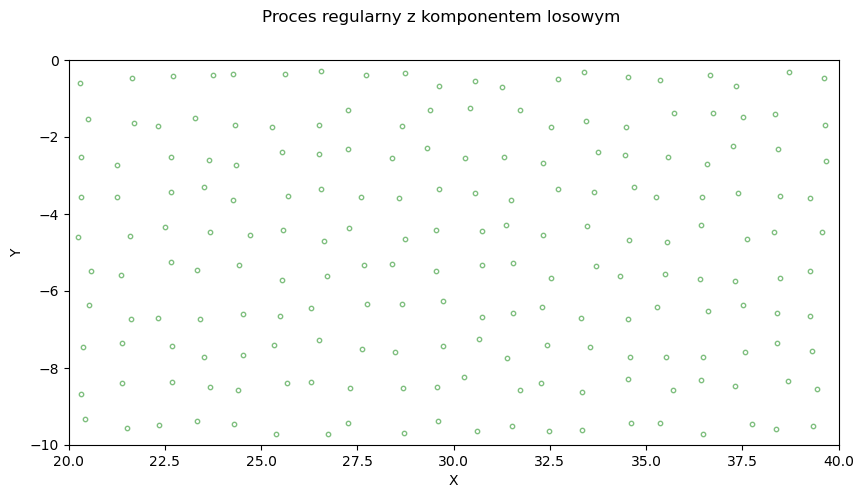

In [5]:
regular_on_rectangle_visual = regular_on_rectangle([20,10],random_component=0.5,x_lim=[20,40],y_lim=[-10,0])

fig, axes = plt.subplots(1,1, figsize = (10,5))
axes.scatter(regular_on_rectangle_visual['X'], regular_on_rectangle_visual['Y'], color='green', s=10, alpha=0.5, facecolor = "white")
fig.suptitle('Proces regularny z komponentem losowym')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_xlim(20, 40)
axes.set_ylim(-10, 0)
axes.set_aspect(1)

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [7 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

In [6]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])  #area
    oczekiwane_n = intensity * a
    n = np.random.poisson(oczekiwane_n)
    
    x = sp.stats.uniform.rvs(loc=x_lim[0],scale = (x_lim[1]-x_lim[0]), size = n)
    y = sp.stats.uniform.rvs(loc=y_lim[0],scale = (y_lim[1]-y_lim[0]), size = n)
    
    homogenous_poisson_df = pd.DataFrame({"X": x, "Y": y})
    
    return homogenous_poisson_df

In [7]:
# Komórka testowa
test_points_3 = homogeneous_poisson_on_rectangle(intensity=5, x_lim=[-11, 18], y_lim=[5, 10])
assert type(test_points_3) == pd.DataFrame
assert test_points_3.shape[1] == 2
assert list(test_points_3.columns) == ["X", "Y"]
assert np.min(test_points_3["X"]) >= -11
assert np.max(test_points_3["X"]) <= 18
assert np.min(test_points_3["Y"]) >= 5
assert np.max(test_points_3["Y"]) <= 10

test_points_4 = homogeneous_poisson_on_rectangle(intensity=2.5, x_lim=[13 ,27], y_lim=[-15, -8])
assert type(test_points_4) == pd.DataFrame
assert test_points_4.shape[1] == 2
assert list(test_points_4.columns) == ["X", "Y"]
assert np.min(test_points_4["X"]) >= 13
assert np.max(test_points_4["X"]) <= 27
assert np.min(test_points_4["Y"]) >= -15
assert np.max(test_points_4["Y"]) <= -8

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: $[-10, 10]$
 - zakres wartości współrzędnej y: $[5, 15]$

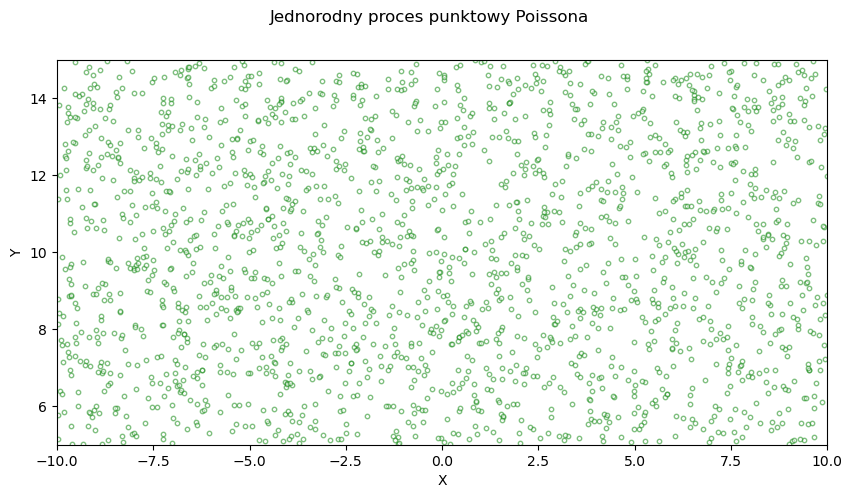

In [8]:
h_poisson_visual = homogeneous_poisson_on_rectangle(10,[-10,10],[5,15])

fig, axes = plt.subplots(1,1, figsize = (10,5), facecolor = "white")
axes.scatter(h_poisson_visual['X'], h_poisson_visual['Y'], color='green', s=10, alpha=0.5, facecolor = "white")
fig.suptitle('Jednorodny proces punktowy Poissona')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_xlim(-10, 10)
axes.set_ylim(5, 15)
axes.set_aspect('equal')

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze ($i_{max}$).
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.


Uwagi do wykonania zadania:
- W celu znalezienia maksymanej wartości funkcji intensywności w obrębie obszaru należy skorzystać z funkcji `scipy.optimize.minimize()`.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [9]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (wartości współrzędnyych X i Y pojedynczego punktu
        lub dwie macierze 1D ze współrzędnymi X i Y wielu punktów) i zwracająca pojedynczą
        wartość lub macierz 1D wartości funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    def minus_intensity(coordinates):
        x, y = coordinates
        return -intensity_function(x, y)

    min = sp.optimize.minimize(minus_intensity, 
                               [(x_lim[0] + x_lim[1]) / 2, (y_lim[0] + y_lim[1]) / 2], 
                               bounds=[x_lim, y_lim])
    max = -min.fun
    
    points = homogeneous_poisson_on_rectangle(max, x_lim, y_lim)
    intensities_at_points = intensity_function(points["X"].values, points["Y"].values)
    keep = np.random.uniform(size=len(points)) < (intensities_at_points / max)
    filtered_points = points[keep]
    
    return filtered_points

In [19]:
# Komórka testowa
def test_intensity_function(x, y):
    return x + 20

test_points_5 = unhomogeneous_poisson_on_rectangle(test_intensity_function, x_lim=[-15, 10], y_lim=[5, 15])
assert type(test_points_5) == pd.DataFrame
assert test_points_5.shape[1] == 2
assert list(test_points_5.columns) == ["X", "Y"]
assert np.min(test_points_5["X"]) >= -15
assert np.max(test_points_5["X"]) <= 10
assert np.min(test_points_5["Y"]) >= 5
assert np.max(test_points_5["Y"]) <= 15

test_points_6 = unhomogeneous_poisson_on_rectangle(test_intensity_function, x_lim=[7, 21], y_lim=[-14, -1])
assert type(test_points_6) == pd.DataFrame
assert test_points_6.shape[1] == 2
assert list(test_points_6.columns) == ["X", "Y"]
assert np.min(test_points_6["X"]) >= 7
assert np.max(test_points_6["X"]) <= 21
assert np.min(test_points_6["Y"]) >= -14
assert np.max(test_points_6["Y"]) <= -1

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu: f(x, y) = 2*x + 5*y
 - zakres wartości współrzędnej x: $[0, 20]$
 - zakres wartości współrzędnej y: $[0, 10]$

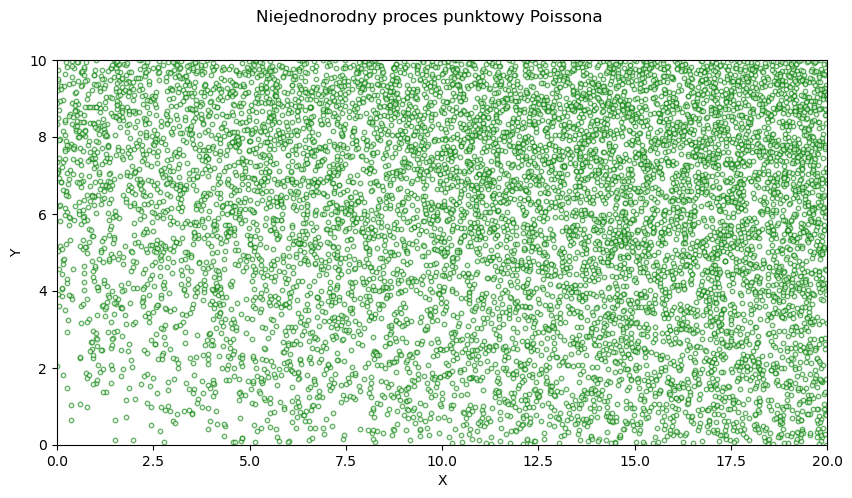

In [21]:
def intensity_function(x, y):
    return 2*x + 5*y

unh_poisson_visual = unhomogeneous_poisson_on_rectangle(intensity_function,[0,20],[0,10])

fig, axes = plt.subplots(1,1, figsize = (10,5))
axes.scatter(unh_poisson_visual['X'], unh_poisson_visual['Y'], color='green', s=10, alpha=0.6, facecolor = "white")
fig.suptitle('Niejednorodny proces punktowy Poissona')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_xlim(0, 20)
axes.set_ylim(0, 10)
axes.set_aspect('equal')

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów, w okręgu o promieniu równym wartości parametru `cluster_radius`, generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwagi do wykonania zadania:
- Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [12]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    x_lim_ext = [x_lim[0]-cluster_radius, x_lim[1]+cluster_radius]
    y_lim_ext = [y_lim[0]-cluster_radius, y_lim[1]+cluster_radius]

    centra_klastrow = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_ext, y_lim_ext)

    df_punkty = pd.DataFrame(columns = ['X','Y'])

    for index, row in centra_klastrow.iterrows():
        x_lim_R = [row["X"]-cluster_radius, row["X"]+cluster_radius]
        y_lim_R = [row["Y"]-cluster_radius, row["Y"]+cluster_radius]

        punkty = homogeneous_poisson_on_rectangle(daughter_intensity, x_lim_R, y_lim_R)

        punkty = punkty[np.sqrt((punkty["X"] - row["X"])**2 + (punkty["Y"] - row["Y"])**2) <= cluster_radius]
        df_punkty = pd.concat([df_punkty, punkty])

    df_punkty = df_punkty[(df_punkty["X"] >= x_lim[0]) & (df_punkty["X"] <= x_lim[1]) & 
                          (df_punkty["Y"] >= y_lim[0]) & (df_punkty["Y"] <= y_lim[1])]
    return df_punkty

In [13]:
# Komórka testowa
test_points_7 = materna_on_rectangle(parent_intensity=0.12, daughter_intensity=5, cluster_radius=1.2, x_lim=[-12, 17], y_lim=[-20,-4])
assert type(test_points_7) == pd.DataFrame
assert test_points_7.shape[1] == 2
assert list(test_points_7.columns) == ["X", "Y"]
assert np.min(test_points_7["X"]) >= -12
assert np.max(test_points_7["X"]) <= 17
assert np.min(test_points_7["Y"]) >= -20
assert np.max(test_points_7["Y"]) <= -4

test_points_8 = materna_on_rectangle(parent_intensity=0.4, daughter_intensity=20, cluster_radius=0.5, x_lim=[-25, -8], y_lim=[-2, 14])
assert type(test_points_8) == pd.DataFrame
assert test_points_8.shape[1] == 2
assert list(test_points_8.columns) == ["X", "Y"]
assert np.min(test_points_8["X"]) >= -25
assert np.max(test_points_8["X"]) <= -8
assert np.min(test_points_8["Y"]) >= -2
assert np.max(test_points_8["Y"]) <= 14

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry  rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: $[-15, 5]$
 - zakres wartości współrzędnej y: $[10, 20]$

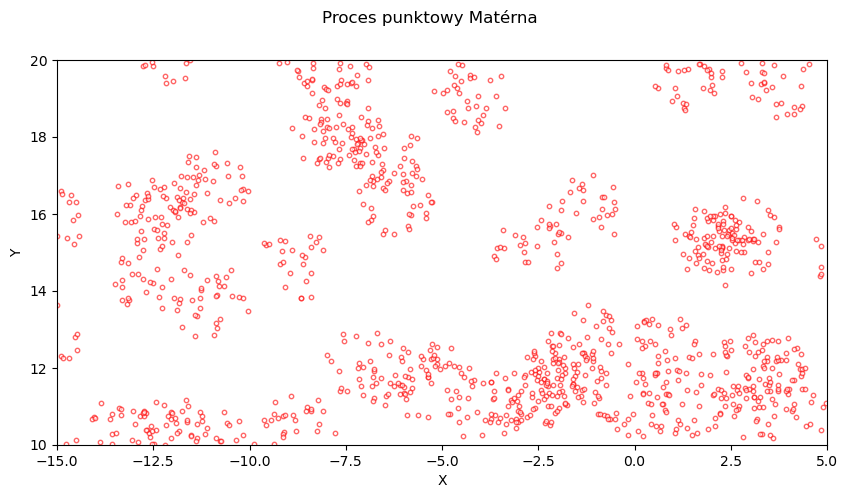

In [14]:
materna_visual = materna_on_rectangle(0.2,10,1,[-15,5], [10,20])

fig, axes = plt.subplots(1,1, figsize = (10,5))
axes.scatter(materna_visual['X'], materna_visual['Y'], color='red', s=10, alpha=0.6, facecolor = "white")
fig.suptitle('Proces punktowy Matérna')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_xlim(-15, 5)
axes.set_ylim(10, 20)
axes.set_aspect(1)

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwagi do wykonania zadania:
- Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [15]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    bufor_x=[x_lim[0]-cluster_sigma*4,x_lim[1]+cluster_sigma*4]
    bufor_y=[y_lim[0]-cluster_sigma*4,y_lim[1]+cluster_sigma*4]
    print(bufor_x)
    print(bufor_y)
    centers = homogeneous_poisson_on_rectangle(parent_intensity,bufor_x,bufor_y)
    points = pd.DataFrame(columns =["X","Y"])
    for point in centers.iterrows():
        x = point[1][0]
        y = point[1][1]
        n_c = np.random.poisson(mean_cluster_size)
        points_x = [x+sp.stats.norm.rvs(0,cluster_sigma) for _ in range(n_c)]
        points_y = [y+sp.stats.norm.rvs(0,cluster_sigma) for _ in range(n_c)]
        points_temp = pd.DataFrame({"X":points_x,"Y":points_y})
        points = pd.concat([points,points_temp])
    points = points[np.all([points["X"]>=x_lim[0], points["X"]<=x_lim[1],points["Y"]>=y_lim[0], points["Y"]<=y_lim[1]], axis=0)]
    return points

In [16]:
# Komórka testowa
test_points_9 = thomas_on_rectangle(parent_intensity=0.13, mean_cluster_size=42, cluster_sigma=0.25, x_lim=[-12, 17], y_lim=[-20,-4])
assert type(test_points_9) == pd.DataFrame
assert test_points_9.shape[1] == 2
assert list(test_points_9.columns) == ["X", "Y"]
assert np.min(test_points_9["X"]) >= -12
assert np.max(test_points_9["X"]) <= 17
assert np.min(test_points_9["Y"]) >= -20
assert np.max(test_points_9["Y"]) <= -4

test_points_10 = thomas_on_rectangle(parent_intensity=0.54, mean_cluster_size=15, cluster_sigma=0.75, x_lim=[-25, -8], y_lim=[-2, 14])
assert type(test_points_10) == pd.DataFrame
assert test_points_10.shape[1] == 2
assert list(test_points_10.columns) == ["X", "Y"]
assert np.min(test_points_10["X"]) >= -25
assert np.max(test_points_10["X"]) <= -8
assert np.min(test_points_10["Y"]) >= -2
assert np.max(test_points_10["Y"]) <= 14

[-13.0, 18.0]
[-21.0, -3.0]
[-28.0, -5.0]
[-5.0, 17.0]


#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: $[25, 45]$
 - zakres wartości współrzędnej y: $[-10, 0]$

In [17]:
thomas = thomas_on_rectangle(parent_intensity=0.2, mean_cluster_size=30, cluster_sigma=0.5, x_lim=[25, 45], y_lim=[-10, 0], facecolor = "white")

fig, axes = plt.subplots(1,1, figsize = (10,5))
axes.scatter(thomas['X'], thomas['Y'], color='red', s=10, alpha=0.6)
fig.suptitle('Proces punktowy Thomasa w obrębie prostokątnego obszaru')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_xlim(25, 45)
axes.set_ylim(-10, 0)
axes.set_aspect(1)

TypeError: thomas_on_rectangle() got an unexpected keyword argument 'facecolor'